In [1]:
#!pip install nltk
import nltk
import pandas as pd
import geopandas as gpd
from IPython.display import Markdown, display
import shapefile
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import pyLDAvis.gensim_models
import numpy as np
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import pos_tag
from nltk.classify import NaiveBayesClassifier
import matplotlib.font_manager as fm
import gensim
from gensim import corpora, models
from collections import Counter
import seaborn as sns


#font_path = 'C:\\Users\\paton\\Documents\\_Glasgow Univ MSc\\_yr2_dissertation\\python\\Open_Sans\\OpenSans-VariableFont_wdth,wght.ttf'
#fm.fontManager.addfont(font_path)

C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## Read in data for Planning Applications with subset option

In [2]:
#read in planning app data
subset_size = 5000  # Specify the size of the random subset you want
planapp_gdf_read = gpd.read_file('D:\\_Glasgow Univ MSc\\_dissertation_data\\other\\Planning_Applications_CCF_PREMIUM_-_Scotland-sh_plnapp_premium pub_plnapppol\\pub_plnapppol.shp')
planapp_gdf = planapp_gdf_read.sample(n=subset_size)


## Read in data for LDPs

In [3]:
#read in LDP data
#planldp_gdf = gpd.read_file('D:\\_Glasgow Univ MSc\\_dissertation_data\\other\\AttributeRemover_3_Output_area.shp')

## Define columns for Description, Application, Status, Proposal and for LDPs for Type and Text of Type

In [4]:
#create columns for later handling
planapp_gdf["text_proposal"] = planapp_gdf["proposal"]
planapp_gdf["text_desc"] = planapp_gdf["dev_desc"]
planapp_gdf["text_app"] = planapp_gdf["appl_desc"]
planapp_gdf["text_status"] = planapp_gdf["stat_desc"]
#planldp_gdf["text_type1"] = planldp_gdf["type"]
#planldp_gdf["text_type2"] = planldp_gdf["text_type1"]


## Text preprocessing function

In [5]:
def text_preprocessing(text):
    if text is None:
        return []  # Return an empty list if text is None
    # Convert words to lower case
    text = text.lower()
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

# Single version for processing selected columns, singly or in parallel

## 1. Select the column for processing (code into drop down?)

In [6]:
#planapp_gdf["text_desc"] 
#planapp_gdf["text_app"] 
#planapp_gdf["text_status"] 
#planapp_gdf["text_proposal"]

planapp_gdf["feature"] = planapp_gdf["text_status"]
planapp_gdf["feature_unsplit"] = planapp_gdf["text_status"]

## 2. Word Clouds
## 3. Apply text preprocessing function to Description

In [7]:
# Create a list of review by applying text_preprocessing function
planapp_gdf["feature"] = list(map(text_preprocessing, planapp_gdf.feature))

# Return to string with to_string function
planapp_gdf['feature_clean'] = list(map(to_string, planapp_gdf["feature"]))

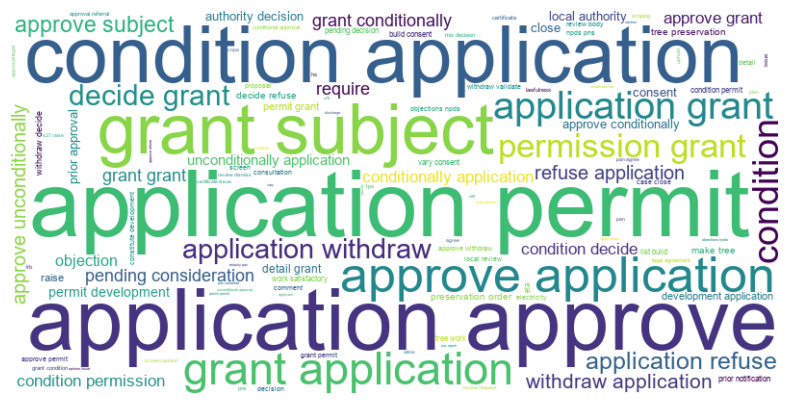

In [8]:
# further word cloud needed for tokenised text
text_app_series = planapp_gdf["feature_clean"]
data = ' '.join(text_app_series.astype(str))
font_path = 'C:\\Windows\\Fonts\\arial.ttf'  # Specify the TrueType font file
wordcloud = WordCloud(font_path=font_path,background_color='white',width=800,height=400).generate(data)
# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. Term count and chart of phrases and tokens (selectable count threshold below for "most_frequent")



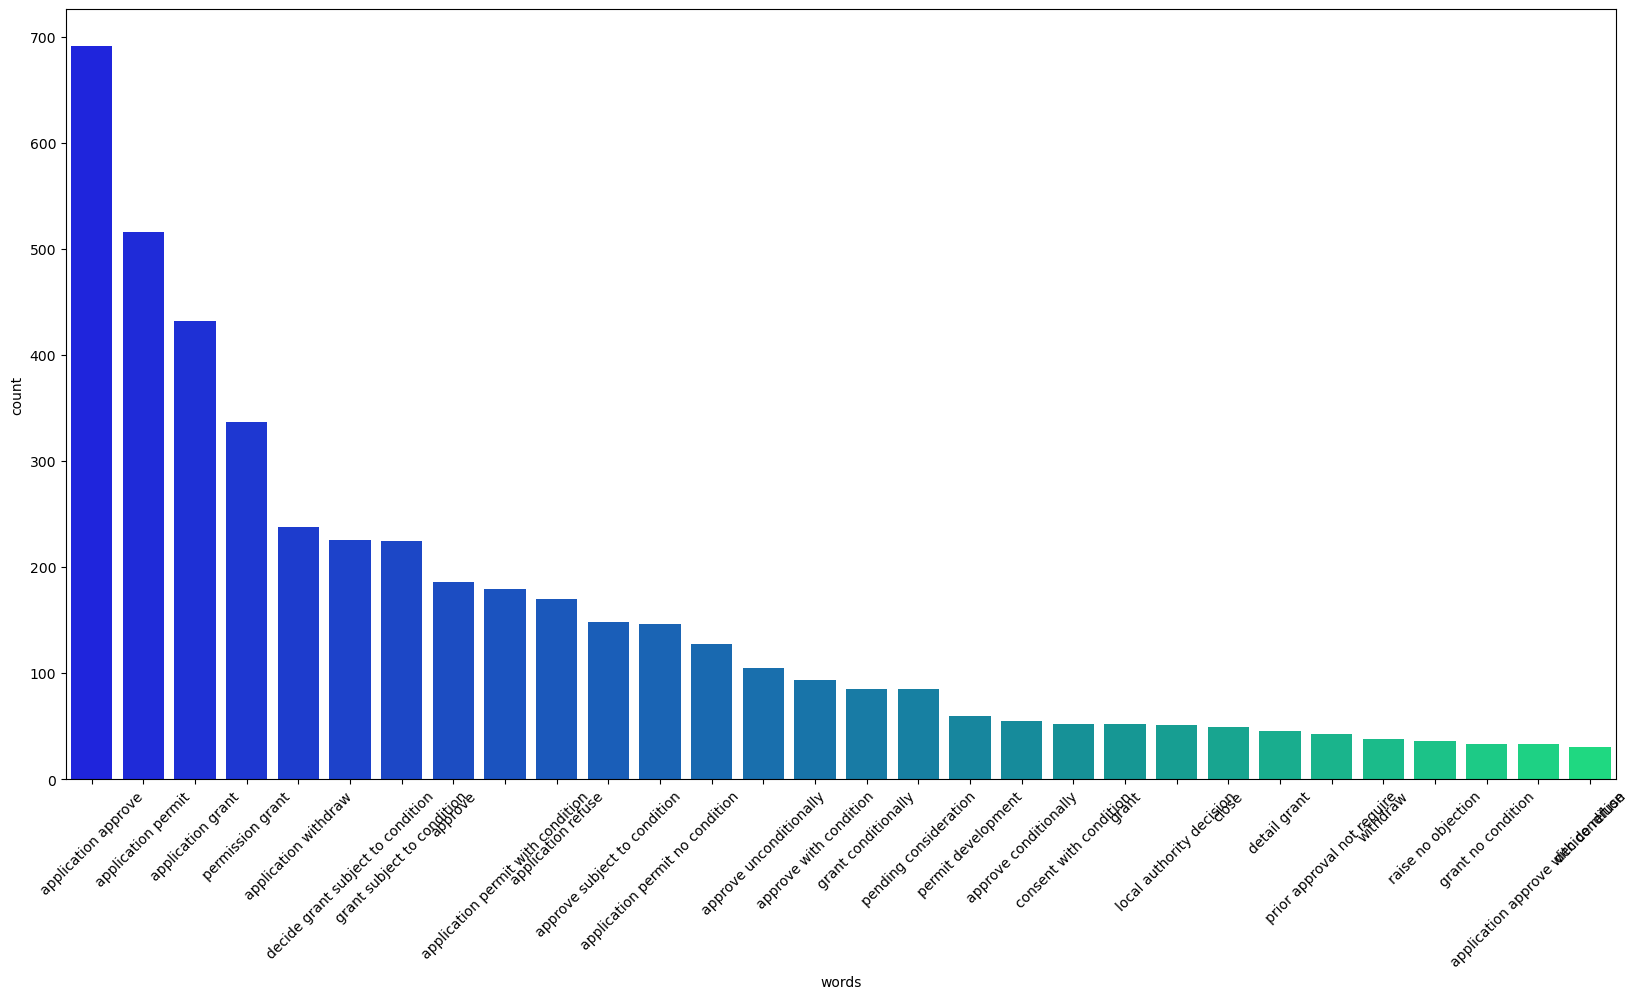

Counter({'application approve': 691, 'application permit': 516, 'application grant': 432, 'permission grant': 337, 'application withdraw': 238, 'decide grant subject to condition': 226, 'grant subject to condition': 225, 'approve': 186, 'application permit with condition': 179, 'application refuse': 170, 'approve subject to condition': 148, 'application permit no condition': 146, '': 128, 'approve unconditionally': 105, 'approve with condition': 94, 'grant conditionally': 85, 'pending consideration': 85, 'permit development': 60, 'approve conditionally': 55, 'consent with condition': 52, 'grant': 52, 'local authority decision': 51, 'close': 49, 'detail grant': 46, 'prior approval not require': 43, 'withdraw': 38, 'raise no objection': 36, 'grant no condition': 33, 'application approve with condition': 33, 'decide refuse': 31, 'approve with no condition': 31, 'not make tree preservation order': 30, 'vary consent': 23, 'list build consent': 19, 'pending decision': 18, 'decide grant': 15,

In [9]:
#phrases
word_counter = Counter(planapp_gdf["feature_clean"])
most_frequent = word_counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data=_, palette='winter')
plt.xticks(rotation=45)

plt.show()

print(word_counter)

Counter({'application': 2423, 'grant': 1476, 'approve': 1361, 'condition': 1177, 'permit': 902, 'to': 612, 'subject': 600, 'with': 394, 'permission': 355, 'withdraw': 290, 'no': 288, 'decide': 279, 'refuse': 224, 'conditionally': 140, 'not': 119, 'unconditionally': 105, 'pending': 103, 'consent': 99, 'consideration': 85, 'require': 81, 'decision': 81, 'development': 72, 'approval': 72, 'prior': 70, 'local': 63, 'close': 57, 'detail': 54, 'objection': 53, 'authority': 51, 'tree': 46, 'raise': 40, 'make': 32, 'preservation': 30, 'order': 30, 'vary': 26, 'objections': 22, 'list': 21, 'build': 21, 'eia': 20, 'work': 19, 'review': 19, 'notification': 16, 'and': 16, 'screen': 15, 'by': 14, 'satisfactory': 14, 'issue': 13, 'do': 11, 'constitute': 11, 'agree': 11, 'certificate': 10, 'proposal': 10, 'comment': 9, 'validate': 8, 'consultation': 8, 'npds': 8, 'pns': 8, 'electricity': 8, 'pan': 8, 'agreement': 7, 'body': 7, 'case': 7, 'conditional': 6, 'scoping': 6, 'pac': 6, 'tpo': 5, 'legal': 5,

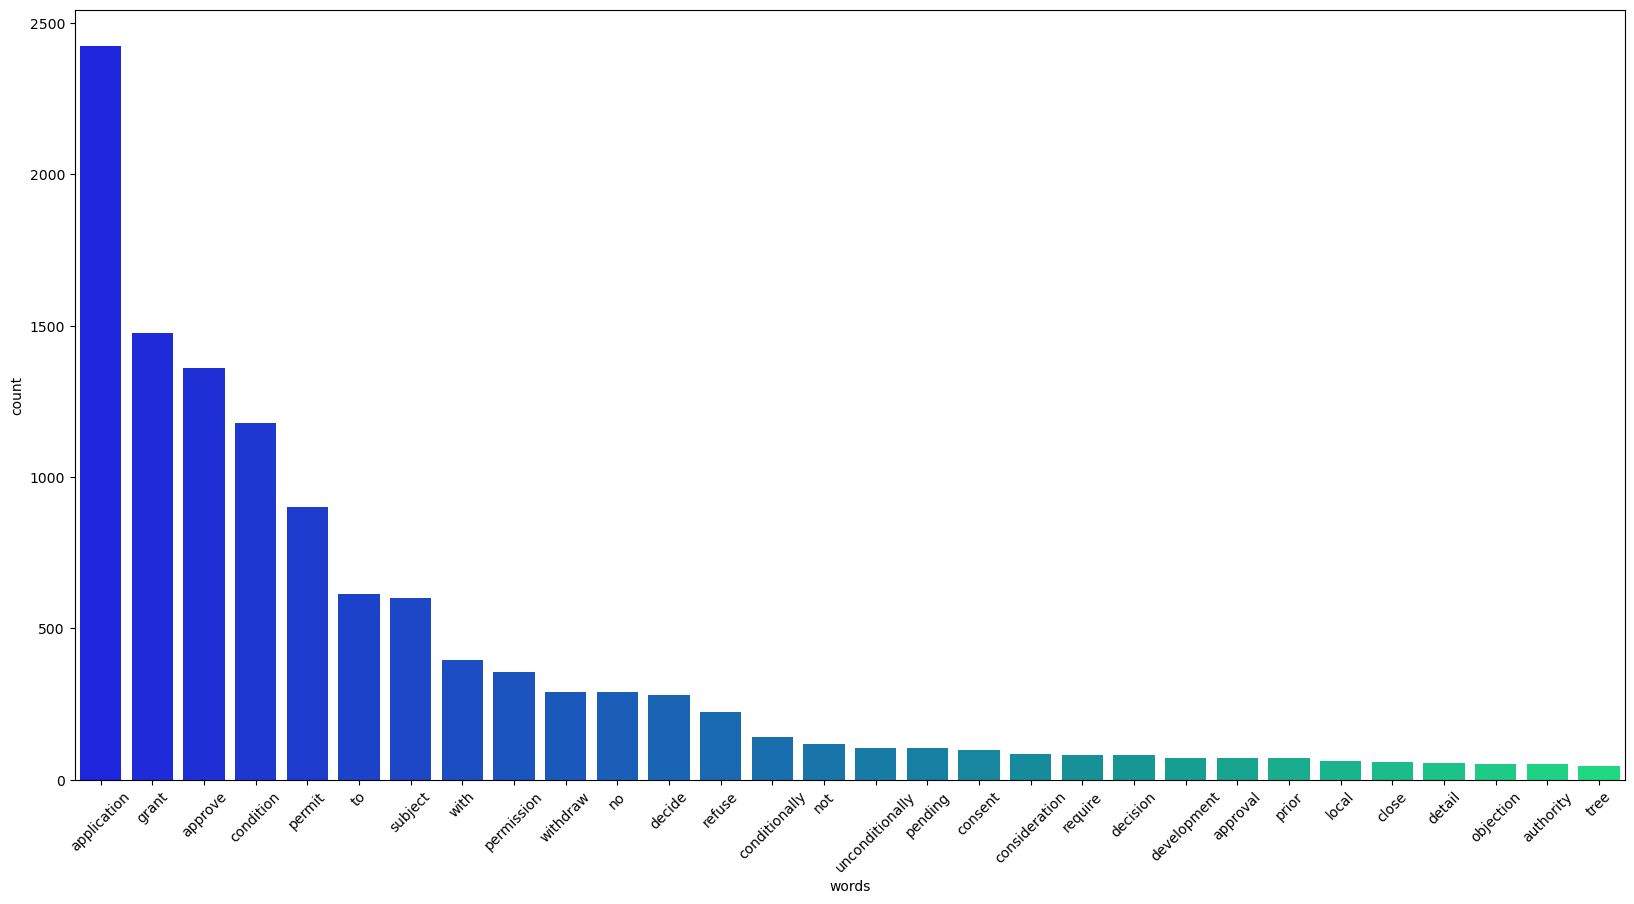

In [10]:
# token words
# Join all word corpus
desc_words = ' '.join(list(planapp_gdf['feature_clean'].values))

# Count and find the 30 most frequent
word_counter = Counter(desc_words.split())
most_frequent = word_counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data=_, palette='winter')
plt.xticks(rotation=45)

print(word_counter)

## 4a. Tokenisation and LDM modelling with coherence score plot - Phrases

In [11]:
#desc_list = [desc.split() for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]
desc_list = [[desc] for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]


In [12]:
desc_list

[[''],
 ['decide grant subject to condition'],
 ['grant subject to condition'],
 ['permission not require'],
 [''],
 ['work to tree not to make tpo'],
 ['approve unconditionally'],
 ['application permit'],
 ['application refuse'],
 ['approve unconditionally'],
 ['application approve'],
 ['grant subject to condition'],
 ['withdraw by applicant'],
 ['application approve'],
 ['decide grant subject to condition'],
 ['application permit'],
 ['grant subject to condition'],
 ['grant subject to condition'],
 ['decide grant subject to condition'],
 ['decide grant subject to condition'],
 ['application approve'],
 ['application approve'],
 ['application permit'],
 ['local authority decision'],
 ['approve unconditionally'],
 ['application permit with condition'],
 ['application refuse'],
 ['application grant'],
 ['raise no objection'],
 ['consent with condition'],
 ['decide grant subject to condition'],
 ['application approve'],
 ['application permit'],
 ['approve'],
 ['application permit'],
 ['a

In [13]:
# Version for the phrases not the single words

# Filter out non-string values
# Filter out non-string values
desc_list = [[desc] for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]

# Create Dictionary
id2word = gensim.corpora.Dictionary(desc_list)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in desc_list]

from gensim.models import CoherenceModel, LdaMulticore

# Compute coherence score
number_of_topics = []
coherence_score = []

for i in range(1, 5): #change back to 20
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             iterations=5,
                             num_topics=i,
                             workers=8)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=desc_list,
                                         dictionary=id2word,
                                         coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

    # Print coherence score for each iteration
    print(f"Iteration {i}: Coherence Score = {coherence_lda}")


Iteration 1: Coherence Score = -24.614833063255873
Iteration 2: Coherence Score = -24.59591953737594
Iteration 3: Coherence Score = -24.49788141215194
Iteration 4: Coherence Score = -24.34758454402342


In [14]:
desc_list

[[''],
 ['decide grant subject to condition'],
 ['grant subject to condition'],
 ['permission not require'],
 [''],
 ['work to tree not to make tpo'],
 ['approve unconditionally'],
 ['application permit'],
 ['application refuse'],
 ['approve unconditionally'],
 ['application approve'],
 ['grant subject to condition'],
 ['withdraw by applicant'],
 ['application approve'],
 ['decide grant subject to condition'],
 ['application permit'],
 ['grant subject to condition'],
 ['grant subject to condition'],
 ['decide grant subject to condition'],
 ['decide grant subject to condition'],
 ['application approve'],
 ['application approve'],
 ['application permit'],
 ['local authority decision'],
 ['approve unconditionally'],
 ['application permit with condition'],
 ['application refuse'],
 ['application grant'],
 ['raise no objection'],
 ['consent with condition'],
 ['decide grant subject to condition'],
 ['application approve'],
 ['application permit'],
 ['approve'],
 ['application permit'],
 ['a

   ## Coherence lineplot of phrases

<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

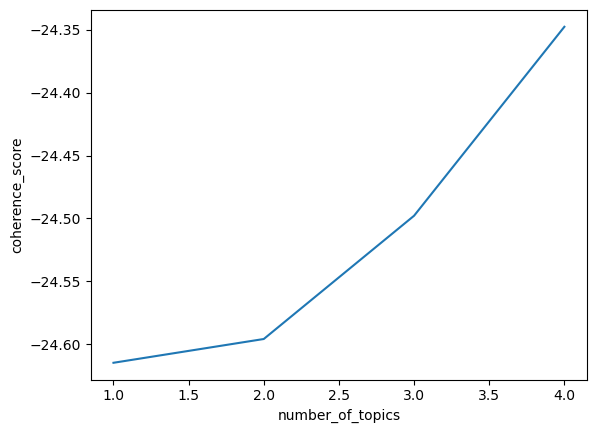

In [15]:
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [16]:
# Define the number of topics 
n_topics = 17

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [17]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.962*"grant subject to condition" + 0.000*"application approve" + 0.000*"application grant" + 0.000*"permission grant" + 0.000*"approve" + 0.000*"approve subject to condition" + 0.000*"application permit no condition" + 0.000*"application withdraw" + 0.000*"application permit with condition" + 0.000*"pre application consultation agree"
Topic: 1 Word: 0.913*"" + 0.001*"application approve" + 0.001*"application grant" + 0.001*"permission grant" + 0.001*"application permit no condition" + 0.001*"application permit with condition" + 0.001*"approve subject to condition" + 0.001*"application withdraw" + 0.001*"approve" + 0.001*"pending consideration"
Topic: 2 Word: 0.944*"application refuse" + 0.000*"application approve" + 0.000*"application grant" + 0.000*"permission grant" + 0.000*"application permit no condition" + 0.000*"pending consideration" + 0.000*"approve" + 0.000*"application withdraw" + 0.000*"application permit with condition" + 0.000*"approve subject to condition

## Visualisation of phrases by topic

In [18]:
pyLDAvis.enable_notebook()

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Convert topic_info to a DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# Convert token_table to a DataFrame
token_table_df = pd.DataFrame(vis_data.token_table)

# Convert topic_coordinates to a DataFrame and replace complex numbers with real values
topic_coords_df = pd.DataFrame(vis_data.topic_coordinates.applymap(np.real))

# Convert any remaining NaN values to 0
topic_coords_df = topic_coords_df.fillna(0)

# Create a new PreparedData object with the updated data
updated_data = pyLDAvis.PreparedData(topic_coordinates=topic_coords_df,
                                    topic_info=topic_info_df,
                                    token_table=token_table_df,
                                    R=vis_data.R,
                                    lambda_step=vis_data.lambda_step,
                                    plot_opts=vis_data.plot_opts,
                                    topic_order=vis_data.topic_order)

# Display the visualization
pyLDAvis.display(updated_data)


## 4b. Tokenisation of phrases to create words 

In [19]:
# Tokenize the documents
tokenized_docs = [word_tokenize(doc) for doc in planapp_gdf["feature_clean"].tolist()]

# Create Dictionary
id2word = gensim.corpora.Dictionary(tokenized_docs)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_docs]

from gensim.models import CoherenceModel, LdaMulticore

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1, 20):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             iterations=5,
                             num_topics=i,
                             workers=8)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=tokenized_docs,
                                         dictionary=id2word,
                                         coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

    # Print coherence score for each iteration
    print(f"Iteration {i}: Coherence Score = {coherence_lda}")


Iteration 1: Coherence Score = -19.475017206069055
Iteration 2: Coherence Score = -19.290706740184618
Iteration 3: Coherence Score = -19.43502037842663
Iteration 4: Coherence Score = -19.167955959761027
Iteration 5: Coherence Score = -19.22402231349067
Iteration 6: Coherence Score = -19.191930181725972
Iteration 7: Coherence Score = -19.175601863234686
Iteration 8: Coherence Score = -19.05621609834434
Iteration 9: Coherence Score = -19.35156172619479
Iteration 10: Coherence Score = -19.04788120416556
Iteration 11: Coherence Score = -19.274516110725155
Iteration 12: Coherence Score = -19.197675992274522
Iteration 13: Coherence Score = -19.28710528343176
Iteration 14: Coherence Score = -19.32022101934876
Iteration 15: Coherence Score = -19.288445385945526
Iteration 16: Coherence Score = -19.341671333995464
Iteration 17: Coherence Score = -19.34537697841598
Iteration 18: Coherence Score = -19.273637596955542
Iteration 19: Coherence Score = -19.26063688959995


<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

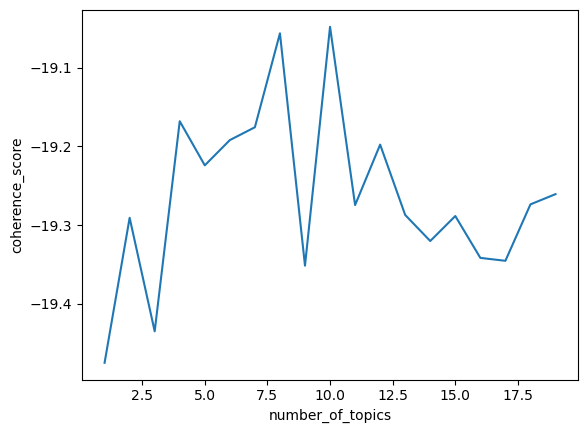

In [20]:
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [21]:
corpus 

[[],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [],
 [(4, 2), (5, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1)],
 [(14, 1), (15, 1)],
 [(14, 1), (16, 1)],
 [(12, 1), (13, 1)],
 [(12, 1), (14, 1)],
 [(0, 1), (2, 1), (3, 1), (4, 1)],
 [(17, 1), (18, 1), (19, 1)],
 [(12, 1), (14, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(14, 1), (15, 1)],
 [(0, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(12, 1), (14, 1)],
 [(12, 1), (14, 1)],
 [(14, 1), (15, 1)],
 [(20, 1), (21, 1), (22, 1)],
 [(12, 1), (13, 1)],
 [(0, 1), (14, 1), (15, 1), (23, 1)],
 [(14, 1), (16, 1)],
 [(2, 1), (14, 1)],
 [(24, 1), (25, 1), (26, 1)],
 [(0, 1), (23, 1), (27, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(12, 1), (14, 1)],
 [(14, 1), (15, 1)],
 [(12, 1)],
 [(14, 1), (15, 1)],
 [(12, 1), (14, 1)],
 [(12, 1), (14, 1)],
 [(0, 1),

   ### Modelling of words running with defined number of topics

In [22]:
# Define the number of topics 
n_topics = 17

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [23]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.007*"consideration" + 0.007*"pending" + 0.007*"consent" + 0.007*"vary" + 0.007*"review" + 0.007*"local" + 0.007*"decision" + 0.007*"raise" + 0.007*"objection" + 0.007*"close"
Topic: 1 Word: 0.480*"grant" + 0.168*"permission" + 0.087*"refuse" + 0.076*"conditionally" + 0.042*"not" + 0.038*"require" + 0.031*"prior" + 0.030*"approval" + 0.025*"detail" + 0.008*"tree"
Topic: 2 Word: 0.487*"unconditionally" + 0.487*"approve" + 0.000*"vary" + 0.000*"consideration" + 0.000*"pending" + 0.000*"consent" + 0.000*"fee" + 0.000*"pac" + 0.000*"assessment" + 0.000*"enquiry"
Topic: 3 Word: 0.335*"condition" + 0.168*"to" + 0.168*"subject" + 0.144*"grant" + 0.105*"no" + 0.077*"decide" + 0.000*"objection" + 0.000*"raise" + 0.000*"consent" + 0.000*"s37"
Topic: 4 Word: 0.007*"consideration" + 0.007*"pending" + 0.007*"consent" + 0.007*"vary" + 0.007*"review" + 0.007*"local" + 0.007*"decision" + 0.007*"raise" + 0.007*"objection" + 0.007*"close"
Topic: 5 Word: 0.993*"approve" + 0.000*"by" + 0.0

## 7. Visualisation using pyLDAvis

In [24]:
import pyLDAvis.gensim_models
import numpy as np
import pandas as pd

# Enable notebook display
pyLDAvis.enable_notebook()

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Convert topic_info to a DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# Convert token_table to a DataFrame
token_table_df = pd.DataFrame(vis_data.token_table)

# Convert topic_coordinates to a DataFrame and replace complex numbers with real values
topic_coords_df = pd.DataFrame(vis_data.topic_coordinates.applymap(np.real))

# Convert any remaining NaN values to 0
topic_coords_df = topic_coords_df.fillna(0)

# Create a new PreparedData object with the updated data
updated_data = pyLDAvis.PreparedData(topic_coordinates=topic_coords_df,
                                    topic_info=topic_info_df,
                                    token_table=token_table_df,
                                    R=vis_data.R,
                                    lambda_step=vis_data.lambda_step,
                                    plot_opts=vis_data.plot_opts,
                                    topic_order=vis_data.topic_order)

# Display the visualization
pyLDAvis.display(updated_data)


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from top2vec import Top2Vec

In [ ]:
tagged_documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(planapp_gdf["feature_clean"])]